# Persiapan Dataset

In [56]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# 2. Import library yang dipakai
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [58]:
# 3. Tentukan folder tempat dataset kamu disimpan
folder_path = "/content/drive/MyDrive/Google Data Analytics/Portofolio/cyclistic_data"


In [59]:
# 4. Cari semua file CSV di folder tersebut
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
print("Jumlah file ditemukan:", len(all_files))
print("Contoh file:", all_files[:3])

Jumlah file ditemukan: 12
Contoh file: ['/content/drive/MyDrive/Google Data Analytics/Portofolio/cyclistic_data/202007-divvy-tripdata.csv', '/content/drive/MyDrive/Google Data Analytics/Portofolio/cyclistic_data/202008-divvy-tripdata.csv', '/content/drive/MyDrive/Google Data Analytics/Portofolio/cyclistic_data/202101-divvy-tripdata.csv']


In [60]:
# 5. Baca semua CSV dan gabung jadi satu dataframe
df_list = []
for file in all_files:
    temp_df = pd.read_csv(file)
    df_list.append(temp_df)

df = pd.concat(df_list, ignore_index=True)

print("Total number of rows:", len(df))
print("Number of columns:", len(df.columns))


Total number of rows: 4460151
Number of columns: 13


In [61]:
# 6. Cek struktur data
df.head()      # lihat 5 baris pertama
df.info()      # info kolom & tipe data
df.isna().sum() # cek jumlah missing value


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4460151 entries, 0 to 4460150
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 442.4+ MB


,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,282068
start_station_id,282694
end_station_name,315109
end_station_id,315570
start_lat,0
start_lng,0


# Data Cleaning

In [62]:
# 1. Bikin Kolom "ride_length"
# Pastikan kolom datetime dibaca sebagai datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Buat kolom durasi (dalam menit)
df['ride_length'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


In [63]:
# 2. Bikin Kolom "day_of_week"
# Day of week (Senin = 0, Minggu = 6)
df['day_of_week'] = df['started_at'].dt.dayofweek

# Kalau mau nama hari
df['day_name'] = df['started_at'].dt.day_name()


In [64]:
# 1. Bikin Kolom "ride_length" dan "day_of_week"
# Pastikan kolom datetime dibaca sebagai datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Buat kolom durasi (dalam menit)
df['ride_length'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Day of week (Senin = 0, Minggu = 6)
df['day_of_week'] = df['started_at'].dt.dayofweek

# Kalau mau nama hari
df['day_name'] = df['started_at'].dt.day_name()

# 3. Bersihin Data Aneh
# Cek distribusi ride_length
print("Min ride_length:", df['ride_length'].min())
print("Max ride_length:", df['ride_length'].max())

# Filter data bersih
df_clean = df[(df['ride_length'] > 1) & (df['ride_length'] < 1440)].copy()
print("Jumlah baris setelah cleaning:", len(df_clean))

Min ride_length: -29049.966666666667
Max ride_length: 55944.15
Jumlah baris setelah cleaning: 4378504


In [65]:
# 4. Cek Ulang Data Bersih
df_clean.info()
df_clean.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 4378504 entries, 0 to 4460150
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_length         float64       
 14  day_of_week         int32         
 15  day_name            object        
dtypes: datetime64[ns](2), float64(5), int32(1), object(8)
memory usage: 551.2+ MB


,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,ride_length,day_of_week
count,4378504,4378504,4.378504e+06,4.378504e+06,4.374678e+06,4.374678e+06,4.378504e+06,4.378504e+06
mean,2020-12-25 09:23:19.299150848,2020-12-25 09:46:23.842464512,4.190313e+01,-8.764438e+01,4.190343e+01,-8.764464e+01,2.307572e+01,3.218737e+00
min,2020-07-01 00:00:14,2020-07-01 00:06:53,4.164000e+01,-8.787000e+01,4.151000e+01,-8.807000e+01,1.016667e+00,0.000000e+00
25%,2020-08-29 14:19:16,2020-08-29 14:49:04,4.188213e+01,-8.765862e+01,4.188224e+01,-8.765879e+01,7.783333e+00,1.000000e+00
50%,2020-11-11 18:02:02,2020-11-11 18:15:20,4.189960e+01,-8.764083e+01,4.190000e+01,-8.764109e+01,1.390000e+01,3.000000e+00
75%,2021-05-12 06:01:19.750000128,2021-05-12 06:17:58.750000128,4.192955e+01,-8.762694e+01,4.192955e+01,-8.762761e+01,2.540000e+01,5.000000e+00
max,2021-06-30 23:59:59,2021-07-01 19:42:18,4.208000e+01,-8.752000e+01,4.216000e+01,-8.744000e+01,1.439900e+03,6.000000e+00
std,NaN,NaN,4.386334e-02,2.591775e-02,4.397236e-02,2.608149e-02,4.276275e+01,1.993289e+00


# Masuk Analisis Eksplorasi (EDA)


In [66]:
# 1. Statistik Dasar (Casual vs Member)
# Statistik dasar per kelompok user
df_clean.groupby('member_casual')['ride_length'].describe()


,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,1897105.0,33.583531,58.338394,1.016667,10.883333,19.516667,36.616667,1439.900000
member,2481399.0,15.042182,21.812457,1.016667,6.400000,10.983333,18.966667,1439.716667


In [67]:
# 2. Rata-rata Durasi Perjalanan
df_clean.groupby('member_casual')['ride_length'].mean()


,ride_length
member_casual,
casual,33.583531
member,15.042182


In [68]:
# 3. Jumlah Ride per Hari
df_clean.groupby(['member_casual', 'day_name']).size().reset_index(name='ride_count')


,member_casual,day_name,ride_count
0,casual,Friday,276361
1,casual,Monday,205681
2,casual,Saturday,432949
3,casual,Sunday,360839
4,casual,Thursday,208901
5,casual,Tuesday,200541
6,casual,Wednesday,211833
7,member,Friday,367677
8,member,Monday,331279
9,member,Saturday,368673


In [69]:
# 4. Pemakaian Berdasarkan Jenis Sepeda
df_clean.groupby(['member_casual','rideable_type']).size().reset_index(name='ride_count')


,member_casual,rideable_type,ride_count
0,casual,classic_bike,447895
1,casual,docked_bike,957767
2,casual,electric_bike,491443
3,member,classic_bike,812714
4,member,docked_bike,1054495
5,member,electric_bike,614190


In [70]:
# 5. Tren Bulanan
df_clean['month'] = df_clean['started_at'].dt.to_period('M')
df_clean.groupby(['month','member_casual']).size().reset_index(name='ride_count')


,month,member_casual,ride_count
0,2020-07,casual,266002
1,2020-07,member,276572
2,2020-08,casual,283890
3,2020-08,member,324980
4,2020-09,casual,226529
5,2020-09,member,295418
6,2020-10,casual,141748
7,2020-10,member,237917
8,2020-11,casual,86628
9,2020-11,member,168387


# Visualisasi

/tmp/ipython-input-1283017084.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_clean, x='member_casual', y='ride_length', estimator='mean', ci=None)


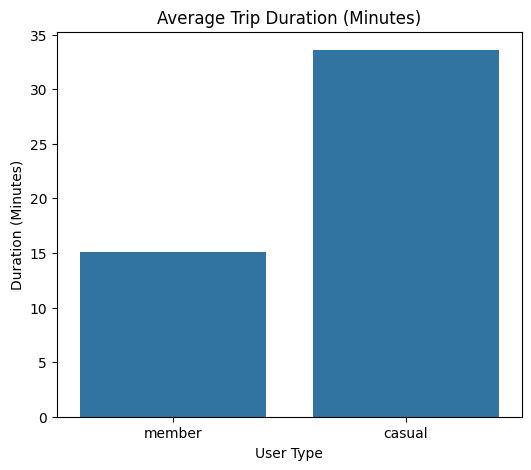

In [71]:
# 1. Rata-rata Durasi Perjalanan (Casual vs Member)
plt.figure(figsize=(6,5))
sns.barplot(data=df_clean, x='member_casual', y='ride_length', estimator='mean', ci=None)
plt.title("Average Trip Duration (Minutes)")
plt.ylabel("Duration (Minutes)")
plt.xlabel("User Type")
plt.show()


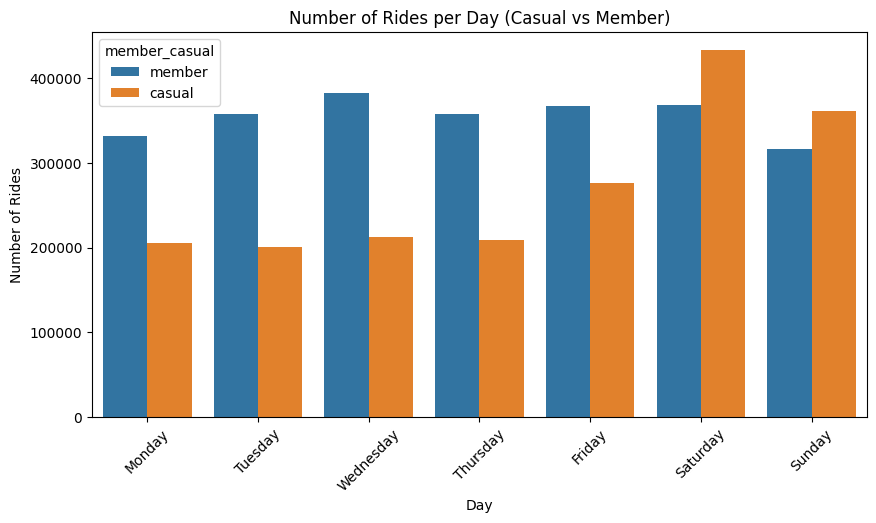

In [72]:
# 2. Jumlah Ride per Hari (Weekday vs Weekend)
plt.figure(figsize=(10,5))
sns.countplot(data=df_clean, x='day_name', hue='member_casual',
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Number of Rides per Day (Casual vs Member)")
plt.ylabel("Number of Rides")
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.show()


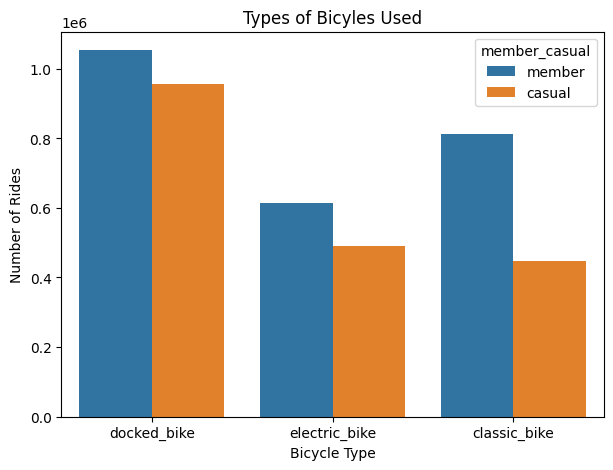

In [73]:
# 3. Pemakaian Berdasarkan Jenis Sepeda
plt.figure(figsize=(7,5))
sns.countplot(data=df_clean, x='rideable_type', hue='member_casual')
plt.title("Types of Bicyles Used")
plt.ylabel("Number of Rides")
plt.xlabel("Bicycle Type")
plt.show()


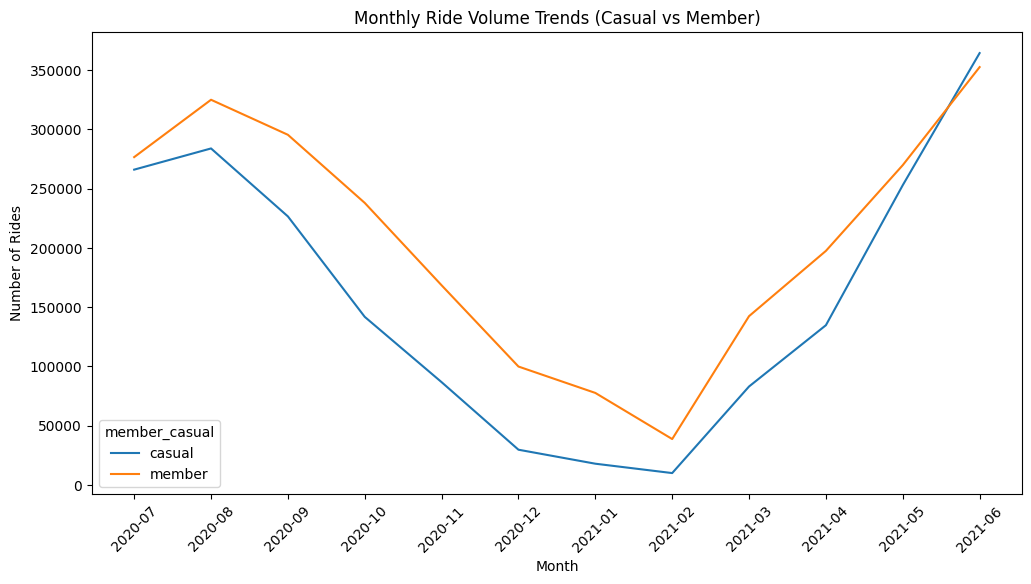

In [74]:
# 4. Tren Bulanan (Casual vs Member)
df_clean['month'] = df_clean['started_at'].dt.to_period('M').astype(str)

# Group by month and member_casual and count the rides
monthly_rides = df_clean.groupby(['month','member_casual']).size().reset_index(name='ride_count')

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_rides, x='month', y='ride_count', hue='member_casual')
plt.title("Monthly Ride Volume Trends (Casual vs Member)")
plt.ylabel("Number of Rides")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()